# **Part - 1**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import cv2
import time
import random
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [ ]:
# Path to Datasets
# Training Path
train_MCL_path = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Training/MCL"
train_FL_path = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Training/FL"
train_CLL_path = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Training/CLL"

# Validation Path 
valid_MCL_path = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Validation/MCL"
valid_FL_path = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Validation/FL"
valid_CLL_path = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Validation/CLL"

# Testing Path 
test_MCL_path = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Testing/MCL"
test_FL_path = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Testing/FL"
test_CLL_path = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Testing/CLL"

In [ ]:
#Training Directories
train_MCL_image = os.listdir(train_MCL_path)
train_FL_image = os.listdir(train_FL_path)
train_CLL_image = os.listdir(train_CLL_path)

#Validation Directories
valid_MCL_image = os.listdir(valid_MCL_path)
valid_FL_image = os.listdir(valid_FL_path)
valid_CLL_image =os.listdir(valid_CLL_path)

#Testing Directories
test_MCL_image = os.listdir(test_MCL_path)
test_FL_image = os.listdir(test_FL_path)
test_CLL_image = os.listdir(test_CLL_path)

In [ ]:
# Printing Numbers of Images in each Dataset
print("Number of MCL Images in Training = ",len(train_MCL_image))
print("Number of FL Images in Training = ",len(train_FL_image))
print("Number of CLL Images in Training = ",len(train_CLL_image))

print('\n')
print("Number of MCL Images in Validation = ",len(valid_MCL_image))
print("Number of FL Images in Validation = ",len(valid_FL_image))
print("Number of CLL Images in Validation = ",len(valid_CLL_image))

print('\n')
print("Number of MCL Images in Testing = ",len(test_MCL_image))
print("Number of FL Images in Testing = ",len(test_FL_image))
print("Number of CLL Images in Testing = ",len(test_CLL_image))

Number of MCL Images in Training =  303
Number of FL Images in Training =  291
Number of CLL Images in Training =  316


Number of MCL Images in Validation =  196
Number of FL Images in Validation =  196
Number of CLL Images in Validation =  196


Number of MCL Images in Testing =  196
Number of FL Images in Testing =  216
Number of CLL Images in Testing =  336


# **Part - 2**

***Training Data***

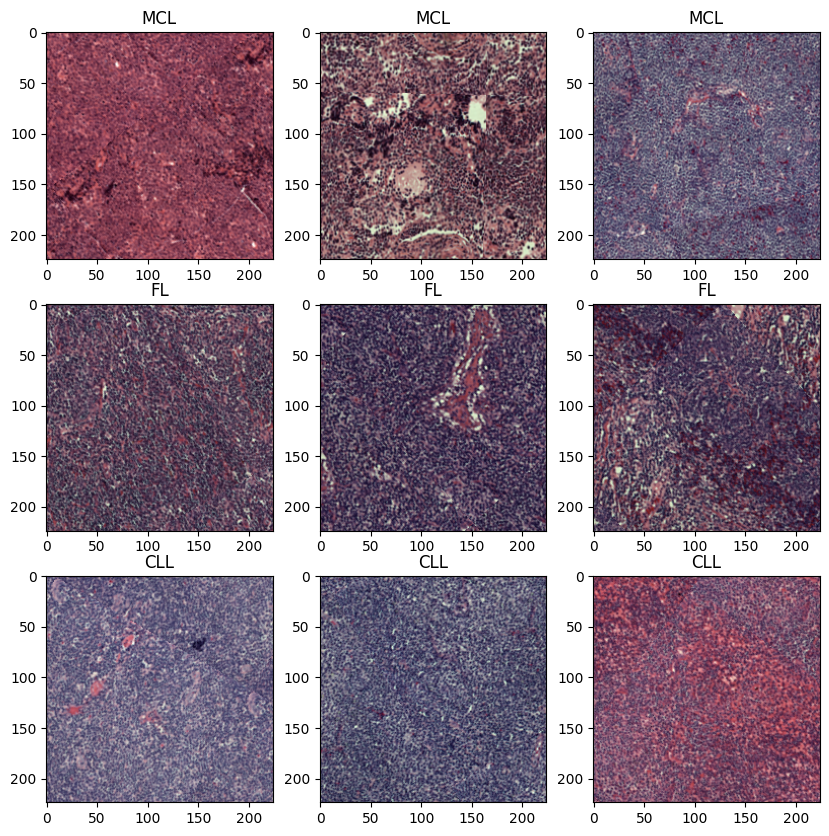

In [ ]:
m=0
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(train_MCL_path + '/' + random.choice(train_MCL_image))
  axes[m].imshow(img)
  axes[m].set_title("MCL")
  m=m+1

for i in range(3):
  img = plt.imread(train_FL_path + '/' + random.choice(train_FL_image))
  axes[m].imshow(img)
  axes[m].set_title("FL")
  m=m+1

for i in range(3):
  img = plt.imread(train_CLL_path + '/' + random.choice(train_CLL_image))
  axes[m].imshow(img)
  axes[m].set_title("CLL")
  m=m+1

***Testing Data***

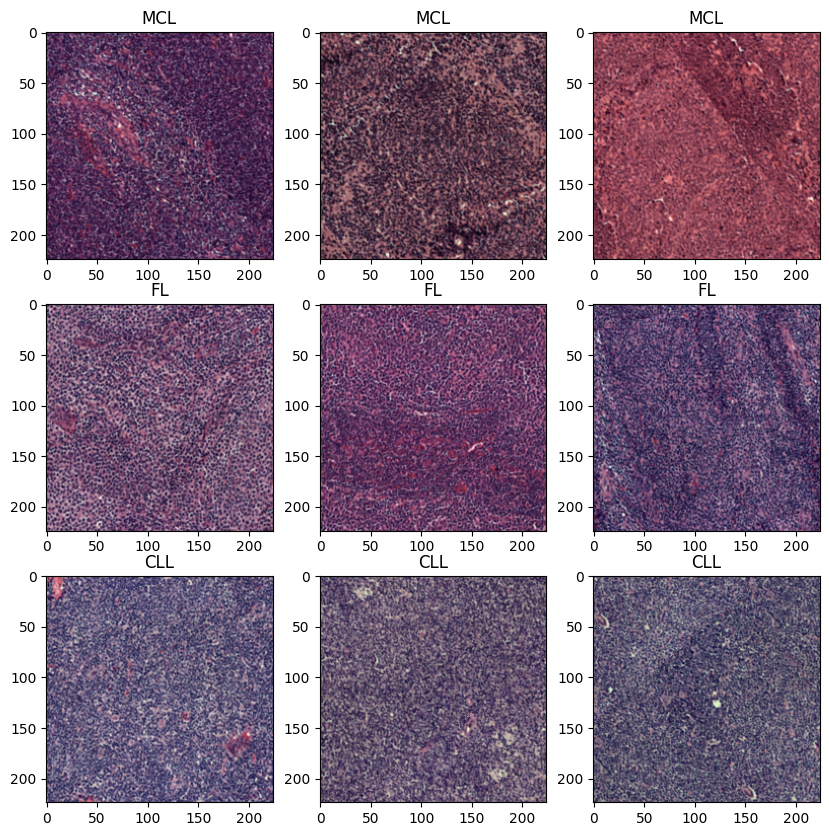

In [ ]:
m=0
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(test_MCL_path + '/' + random.choice(test_MCL_image))
  axes[m].imshow(img)
  axes[m].set_title("MCL")
  m=m+1

for i in range(3):
  img = plt.imread(test_FL_path + '/' + random.choice(test_FL_image))
  axes[m].imshow(img)
  axes[m].set_title("FL")
  m=m+1

for i in range(3):
  img = plt.imread(test_CLL_path + '/' + random.choice(test_CLL_image))
  axes[m].imshow(img)
  axes[m].set_title("CLL")
  m=m+1

***Validation Data***

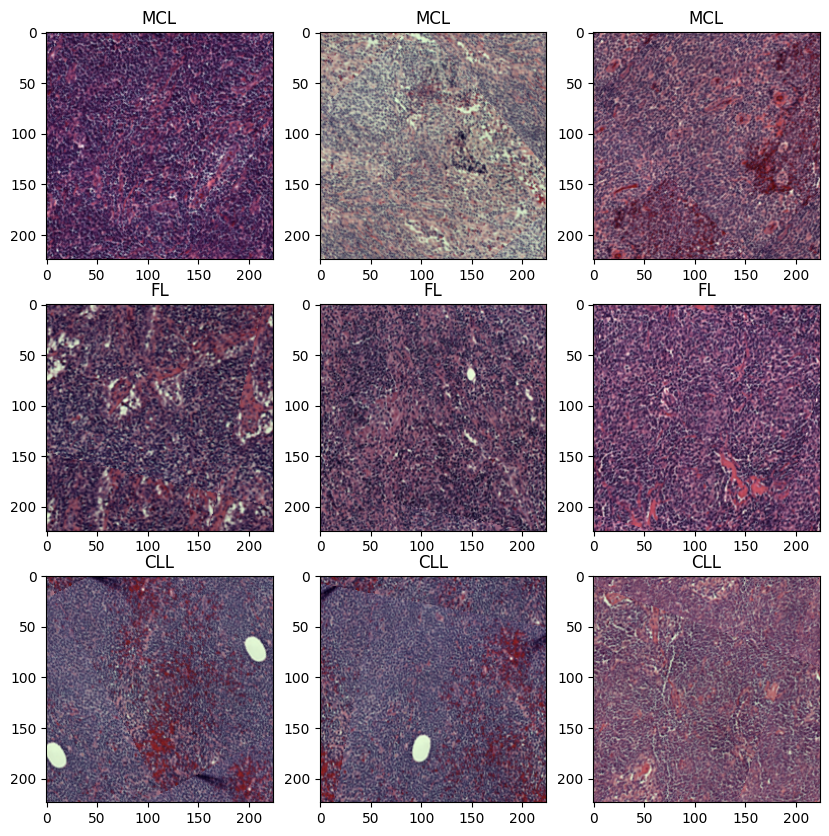

In [ ]:
m=0
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(valid_MCL_path + '/' + random.choice(valid_MCL_image))
  axes[m].imshow(img)
  axes[m].set_title("MCL")
  m=m+1

for i in range(3):
  img = plt.imread(valid_FL_path + '/' + random.choice(valid_FL_image))
  axes[m].imshow(img)
  axes[m].set_title("FL")
  m=m+1

for i in range(3):
  img = plt.imread(valid_CLL_path + '/' + random.choice(valid_CLL_image))
  axes[m].imshow(img)
  axes[m].set_title("CLL")
  m=m+1

# **Part - 3**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

base_model = tf.keras.applications.resnet50.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Add custom layers
x = base_model.output
x = layers.GlobalMaxPooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.3)(x)
preds = layers.Dense(3, activation='softmax')(x)
model = models.Model(inputs=base_model.input, outputs=preds)

lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,  
    decay_steps=3000,             
    decay_rate=0.96               
)


opt_adam = tf.keras.optimizers.Adam(
    learning_rate=lr_scheduler,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-06
)
model.compile(optimizer=opt_adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
for layer in model.layers[:175]:
  layer.trainable=False
for layer in model.layers[175:]:
  layer.trainable=True

In [ ]:
train_generator = ImageDataGenerator()
train_data = train_generator.flow_from_directory(
    "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Training",
    target_size=(224, 224),
    class_mode='sparse',
    shuffle=True,
)

Found 910 images belonging to 3 classes.


In [ ]:
valid_generator = ImageDataGenerator()
valid_data = valid_generator.flow_from_directory(
    "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Validation",
    target_size=(224, 224),
    class_mode='sparse',
    shuffle=True,
)

Found 588 images belonging to 3 classes.


In [ ]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data=test_generator.flow_from_directory("/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Testing",
                                             target_size=(224,224),
                                             class_mode='sparse',
                                             shuffle=True,
                                            )

Found 748 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{'CLL': 0, 'FL': 1, 'MCL': 2}

In [ ]:
valid_data.class_indices

NameError: ignored

In [ ]:
test_data.class_indices

{'CLL': 0, 'FL': 1, 'MCL': 2}

In [ ]:
model_checkpoint = callbacks.ModelCheckpoint('/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/resnet50.h5', monitor='val_loss', save_best_only=True)

In [ ]:
hist = model.fit(train_data, epochs=100, validation_data=valid_data, callbacks=[model_checkpoint])

Epoch 1/100
29/29 [==============================] - 68s 598ms/step - loss: 3.9875 - accuracy: 0.3692 - val_loss: 4.0569 - val_accuracy: 0.3588
Epoch 2/100
29/29 [==============================] - 14s 489ms/step - loss: 3.7060 - accuracy: 0.4912 - val_loss: 3.8095 - val_accuracy: 0.4031
Epoch 3/100
29/29 [==============================] - 14s 493ms/step - loss: 3.4763 - accuracy: 0.6011 - val_loss: 3.6595 - val_accuracy: 0.4779
Epoch 4/100
29/29 [==============================] - 19s 655ms/step - loss: 3.3413 - accuracy: 0.6626 - val_loss: 3.4725 - val_accuracy: 0.5850
Epoch 5/100
29/29 [==============================] - 19s 642ms/step - loss: 3.1488 - accuracy: 0.7593 - val_loss: 3.3099 - val_accuracy: 0.6803
Epoch 6/100
29/29 [==============================] - 16s 562ms/step - loss: 2.9691 - accuracy: 0.8374 - val_loss: 3.1349 - val_accuracy: 0.7568
Epoch 7/100
29/29 [==============================] - 16s 538ms/step - loss: 2.9101 - accuracy: 0.8560 - val_loss: 3.0862 - val_accuracy:

# **Part - 4**

In [ ]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.xlabel("Epoches")
plt.ylabel("Training loss")
plt.title("Training v/s Test Loss Progress")
plt.legend()

NameError: ignored

In [ ]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Training Accuracy")
plt.title("Training v/s Test Accuracy progress")
plt.legend()

# **Part - 5**

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/resnet50.h5')

Training

In [ ]:
train_generator = ImageDataGenerator()
train_data = train_generator.flow_from_directory(
    "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Training",
    target_size=(224, 224),
    class_mode='sparse',
    shuffle=False,
    batch_size=32
    )

Found 910 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{'CLL': 0, 'FL': 1, 'MCL': 2}

In [ ]:
actual_train_class=train_data.classes
actual_valid_class=valid_data.classes
from sklearn.metrics import confusion_matrix
train_data.reset()
y_train_pred = model.predict(train_data)
y_train_pred =np.argmax(y_train_pred, axis=1)

29/29 [==============================] - 204s 7s/step


1.0

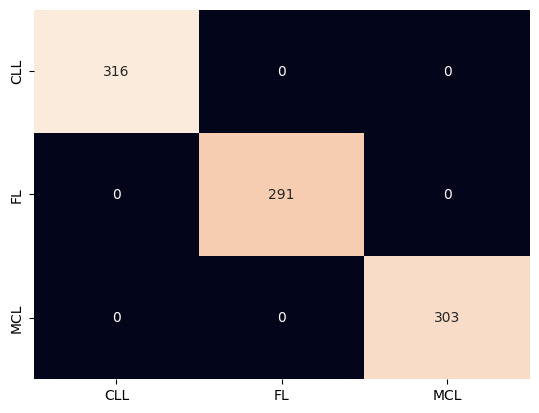

In [ ]:
cm = confusion_matrix(actual_train_class, y_train_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['CLL','FL','MCL'], yticklabels=['CLL','FL','MCL'],cbar=False)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(actual_train_class, y_train_pred)

In [ ]:
print(classification_report(actual_train_class, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       1.00      1.00      1.00       291
           2       1.00      1.00      1.00       303

    accuracy                           1.00       910
   macro avg       1.00      1.00      1.00       910
weighted avg       1.00      1.00      1.00       910



Testing

In [ ]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data=test_generator.flow_from_directory("/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Testing",
                                             target_size=(224,224),
                                             class_mode='sparse',
                                             shuffle=False,
                                             batch_size=32
                                            )

Found 748 images belonging to 3 classes.


In [ ]:
test_data.class_indices

{'CLL': 0, 'FL': 1, 'MCL': 2}

24/24 [==============================] - 159s 6s/step


<Axes: >

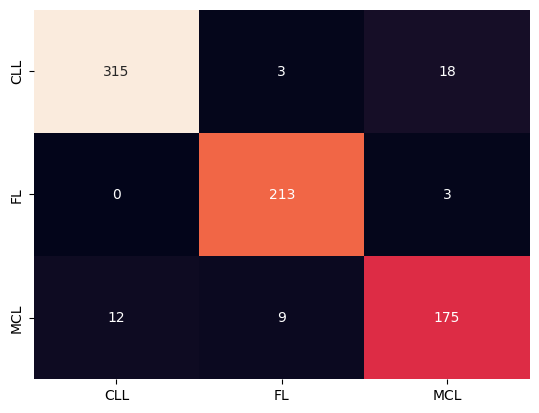

In [ ]:
actual_test_class=test_data.classes

y_test_pred = model.predict(test_data)
y_test_pred =np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(actual_test_class, y_test_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['CLL','FL','MCL'], yticklabels=['CLL','FL','MCL'],cbar=False)

In [ ]:
print(accuracy_score(actual_test_class, y_test_pred))
print(classification_report(actual_test_class, y_test_pred))

0.9398395721925134
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       336
           1       0.95      0.99      0.97       216
           2       0.89      0.89      0.89       196

    accuracy                           0.94       748
   macro avg       0.93      0.94      0.94       748
weighted avg       0.94      0.94      0.94       748



Validation

In [ ]:
valid_generator = ImageDataGenerator()
valid_data = valid_generator.flow_from_directory(
    "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Validation",
    target_size=(224, 224),
    class_mode='sparse',
    shuffle=False,
    batch_size=32
)

Found 588 images belonging to 3 classes.


In [ ]:
valid_data.class_indices

{'CLL': 0, 'FL': 1, 'MCL': 2}

19/19 [==============================] - 120s 6s/step


<Axes: >

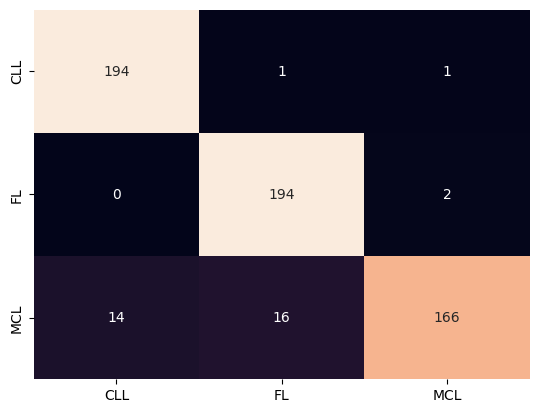

In [ ]:
actual_valid_class=valid_data.classes

y_valid_pred = model.predict(valid_data)
y_valid_pred =np.argmax(y_valid_pred, axis=1)

cm = confusion_matrix(actual_valid_class, y_valid_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['CLL','FL','MCL'], yticklabels=['CLL','FL','MCL'],cbar=False)

In [ ]:
print(accuracy_score(actual_valid_class, y_valid_pred))
print(classification_report(actual_valid_class, y_valid_pred))

0.9421768707482994
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       196
           1       0.92      0.99      0.95       196
           2       0.98      0.85      0.91       196

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.94      0.94      0.94       588



# **Part - 6**

Training

In [ ]:
# Training
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(3,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in train_CLL_image:
  if(i<=2):
    test_img=load_img(train_CLL_path+'/'+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
   
    pred=model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='CLL'
    elif pred==1:
      result='FL'
    elif pred==2:
      result='MCL'
    
    axes[i].set_title("Actual: CLL \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in train_FL_image:
  if(i>2 and i<=5):
    test_img=load_img(train_FL_path+'/'+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
  
    pred=model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='CLL'
    elif pred==1:
      result='FL'
    elif pred==2:
      result='MCL'

    axes[i].set_title("Actual: FL \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
 


for j in train_MCL_image:
  if(i>5 and i<=8):
    test_img=load_img(train_MCL_path+'/'+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
   
    pred=model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='MCL'
    elif pred==1:
      result='FL'
    elif pred==2:
      result='CLL'
    
    axes[i].set_title("Actual: CLL \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1

fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

Testing

In [ ]:
# Testing

from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(3,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in test_CLL_image:
  if(i<=2):
    test_img=load_img(test_CLL_path+'/'+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
    
    pred=model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='CLL'
    elif pred==1:
      result='FL'
    elif pred==2:
      result='MCL'
    
    axes[i].set_title("Actual: CLL \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in test_FL_image:
  if(i>2 and i<=5):
    test_img=load_img(test_FL_path+'/'+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
    pred=model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='MCL'
    elif pred==1:
      result='FL'
    elif pred==2:
      result='CLL'

    axes[i].set_title("Actual: FL \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1


for j in test_MCL_image:
  if(i>5 and i<=8):
    test_img=load_img(test_MCL_path+'/'+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
    pred=model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='CLL'
    elif pred==1:
      result='FL'
    elif pred==2:
      result='MCL'
    
    axes[i].set_title("Actual: MCL \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    




fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

# **Part - 7**

In [3]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=7117fcbd91e5349e05ef3e339bf723b355fb5e4cf2cf3a8ef6dfc39389808f72
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [4]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Replace these with the correct paths to your validation folders
valid_MCL_folder = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Validation//MCL"
valid_FL_folder = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Validation/FL"
valid_CLL_folder = "/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Validation/CLL"

# Get the list of validation image paths for each folder
valid_MCL_images = [os.path.join(valid_MCL_folder, f) for f in os.listdir(valid_MCL_folder)]
valid_FL_images = [os.path.join(valid_FL_folder, f) for f in os.listdir(valid_FL_folder)]
valid_CLL_images = [os.path.join(valid_CLL_folder, f) for f in os.listdir(valid_CLL_folder)]

# Combine the lists and choose a random image path
random_image_path = random.choice(valid_MCL_images + valid_FL_images + valid_CLL_images)

# Load and preprocess the image
image = load_img(random_image_path, target_size=(224, 224))
image = img_to_array(image)
image /= 255.0
image = image.reshape(1, 224, 224, 3)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [6]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

1/1 [==============================] - 18s 18s/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 52ms/step


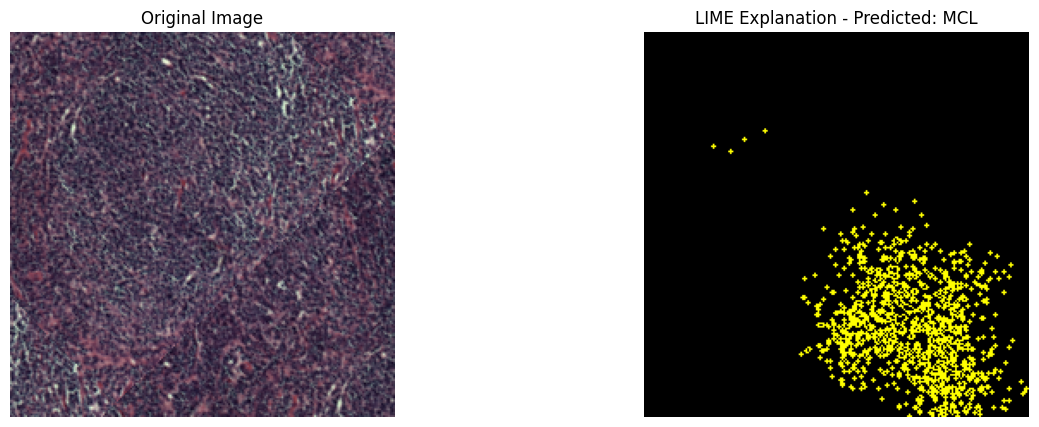

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm


model_path = '/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/resnet50.h5'
model = load_model(model_path)

# Load the image
image_path = '/content/drive/MyDrive/AI - Sem 6/Malignant Lymphoma Classification/Dataset/Augmented_Dataset/Training/MCL/aug_0_9263.tif'
original_img = imread(image_path)

# Preprocess the input image
preprocessed_img = preprocess_input(original_img)

# Predict the class using your custom model
predictions = model.predict(np.expand_dims(preprocessed_img, axis=0))
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class index to the corresponding label
class_mapping = {0: 'CLL', 1: 'FL', 2:'MCL'}  # Replace with your class mapping
actual_predicted_label = class_mapping[predicted_class[0]]

# Define the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a wrapper function for your custom model
def wrapped_model(input_data):
    preds = model.predict(input_data)
    return preds

# Generate the LIME explanation
segmenter = SegmentationAlgorithm('quickshift', kernel_size=4, max_dist=200, ratio=0.2)
explanation = explainer.explain_instance(preprocessed_img, wrapped_model, top_labels=5, hide_color=0, num_samples=1000, segmentation_fn=segmenter)

# Get the mask for the actual predicted class
temp, mask = explanation.get_image_and_mask(predicted_class[0], positive_only=True, num_features=5, hide_rest=True)

# Display the original image and LIME explanation with the actual predicted label
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(original_img)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(mark_boundaries(temp, mask))
ax2.set_title(f'LIME Explanation - Predicted: {actual_predicted_label}')
ax2.axis('off')

plt.show()
